In [2]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt


# Test butterworth filter and its freqeuncy response

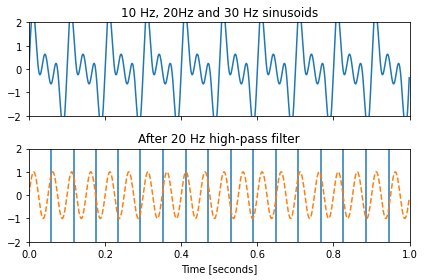

In [3]:
t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t) + np.sin(2*np.pi*30*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz, 20Hz and 30 Hz sinusoids')
ax1.axis([0, 1, -2, 2])


nyq = 0.5 * 1000
low = 25 / nyq
high = 15 / nyq

# c, d = signal.butter(10, 9,'hp', fs=1000, output='ba')
# hp_filtered = signal.filtfilt(c,d, sig)

# b,a = signal.butter(10, 25,'lp', fs=1000, output='ba')
# filtered = signal.filtfilt(b,a, hp_filtered)


b,a = signal.butter(10, [low, high], btype='band', output='ba')
filtered = signal.filtfilt(b,a, sig)



ax2.plot(t, filtered)
ax2.plot(t, np.sin(2*np.pi*20*t), '--')
ax2.set_title('After 20 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

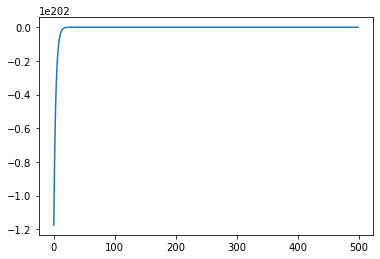

In [68]:
plt.plot(filtered[500:])

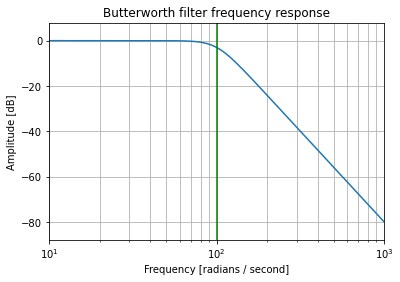

In [24]:
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

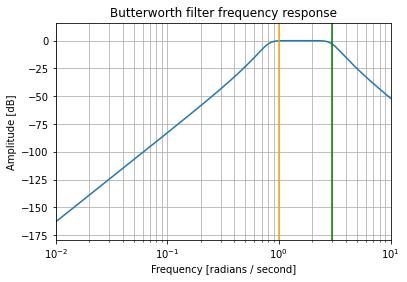

In [4]:
b, a = signal.butter(4, [0.8,3], 'band', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(3, color='green') # cutoff frequency
plt.axvline(1, color='orange') # cutoff frequency

plt.show()

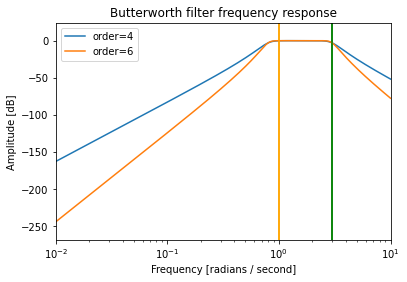

In [8]:
for order in [4, 6]:
    b, a = signal.butter(order, [0.8,3], 'band', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)), label='order=' + str(order))
    plt.title('Butterworth filter frequency response')
    plt.xlabel('Frequency [radians / second]')
    plt.ylabel('Amplitude [dB]')
    plt.margins(0, 0.1)
    plt.grid(which='both', axis='both')
    plt.axvline(3, color='green') # cutoff frequency
    plt.axvline(1, color='orange') # cutoff frequency
    plt.legend()

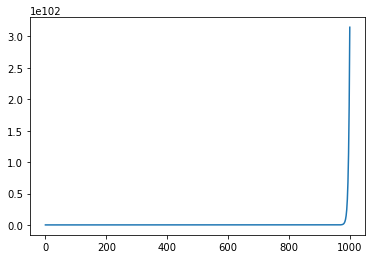

In [55]:
def butter_highpass(cutoff, sr, order):
    nyq = 0.5*sr
    normal_cutoff = cutoff/nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False, output='ba')
    return b, a
## A low pass filter allows frequencies lower than a cut-off value
def butter_lowpass(cutoff, sr, order):
    nyq = 0.5*sr
    normal_cutoff = cutoff/nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False, output='ba')
    return b, a


def final_filter(data, sr, order):
    d, c = butter_highpass(15, sr, order)
    y = signal.filtfilt(d, c, data)
    f, e = butter_lowpass(25, sr, order)
    z = signal.filtfilt(f, e, y)
    return z

def bp_filter(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band', analog=False, output='ba')
    return b, a


b, a = bp_filter(15, 25, 1000, 10)
filt_sig = signal.lfilter(b,a,sig)
plt.plot(filt_sig)
# plt.plot(np.sin(2*np.pi*20*t), '--')
